# Problem Statement and Data Description


**Chennai House Price Prediction (Regression)**

ChennaiEstate is a real estate firm based in Chennai that is involved in the property business for the past 5 years. Since, they are in the business for so long, they have enough data of all the real estate transactions in the city.

They decided to venture into Analytics and have now started a division called “Chennai Estate Analytics” to give consumers as much information as possible about housings and the real estate market in Chennai. A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring real-estate owners have a
trusted way to monitor the asset is incredibly important. Hence, they have hired you as a consultant to help them give insights and develop a model to accurately predict real estate prices.

Based on the train dataset, you will need to develop a model that accurately predicts the real estate price in Chennai.

### Data Description

  
## House Features
   - INT_SQFT – The interior Sq. Ft of the property
   - N_BEDROOM – The number of Bed rooms
   - N_BATHROOM - The number of bathrooms
   - N_ROOM – Total Number of Rooms
   - QS_ROOMS – The quality score assigned for rooms based on buyer reviews
   - QS_BATHROOM – The quality score assigned for bathroom based on buyer reviews
   - QS_BEDROOM – The quality score assigned for bedroom based on buyer reviews
   - QS_OVERALL – The Overall quality score assigned for the property
   - SALE_COND – The Sale Condition
       - Normal: Normal Sale
       - Abnorml: Abnormal Sale - trade, foreclosure, short sale
       - AdjLand: Adjoining Land Purchase
       - Family: Sale between family members
       - Partial: Home was not completed when last assessed
   - BUILDTYPE – The type of building
        - House
        - Commercial
        - Others



## Surrounding and Locality
   - AREA – The property in which the real estate is located
   - DIST_MAINROAD – The distance of the property to the main road
   - PARK_FACIL – Whether parking facility is available
   - UTILITY_AVAIL
        - AllPub: All public Utilities (E,G,W,& S)
        - NoSewr: Electricity, Gas, and Water (Septic Tank)
        - NoSeWa: Electricity and Gas Only
        - ELO: Electricity only
   - STREET
        - Gravel
        - Paved
        - No Access
   - MZZONE
        - A: Agriculture
        - C: Commercial
        - I: Industrial
        - RH: Residential High Density
        - RL: Residential Low Density
        - RM: Residential Medium Density
        

## House Sale Price
   - PRT_ID – The Property Transaction ID assigned by ChennaiEstate
   - COMMIS – The Commission paid to the agent
   - SALES_PRICE – The total sale price of the property


# Loading the Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("chennai_house_price_prediction.csv")
df.shape

(7109, 19)

In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


# Data Exploration

### Describe function

In [4]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


- The describe function works only for continuous variables
- We can identify the number of missing values from the 'count' given
- Comparing the 75% and the max value, determine presence of outliers

In [5]:
df.describe(include='all')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109,7109,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109,7109,7109,7109,7109,7109,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
unique,7109,17,NaN,NaN,NaN,NaN,NaN,9,3,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN
top,P00036,Chrompet,NaN,NaN,NaN,NaN,NaN,AdjLand,Yes,House,AllPub,Paved,RL,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1681,NaN,NaN,NaN,NaN,NaN,1433,3587,2444,1886,2560,1858,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1382.073006,99.603179,1.637029,1.213260,3.688704,NaN,NaN,NaN,NaN,NaN,NaN,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,NaN,NaN,457.410902,57.403110,0.802902,0.409639,1.019099,NaN,NaN,NaN,NaN,NaN,NaN,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,NaN,NaN,500.000000,0.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,NaN,NaN,993.000000,50.000000,1.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,NaN,NaN,1373.000000,99.000000,1.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,NaN,NaN,1744.000000,148.000000,2.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07


- Count can be used to find out missing values
- Gives unique values for categorical variables

### Isnull function

In [6]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

### Data types

In [7]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [8]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()

In [9]:
temp

,data_type,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


## Univariate Analysis

### Histogram

Text(0.5, 0, 'Sales')

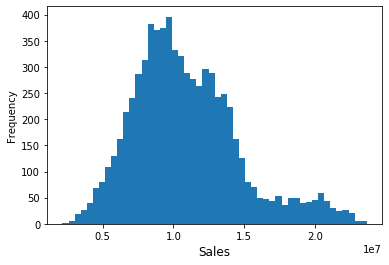

In [10]:
## target variable 

df['SALES_PRICE'].plot.hist(bins = 50)
plt.xlabel('Sales', fontsize=12)

- The distribution of the target variable is slightly right skewed. 
- We can see a small number of houses with a very high price. 

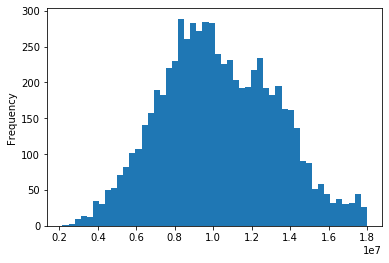

In [11]:
(df['SALES_PRICE'].loc[df['SALES_PRICE']<18000000]).plot.hist(bins=50)

Text(0.5, 0, 'Area in sq feet')

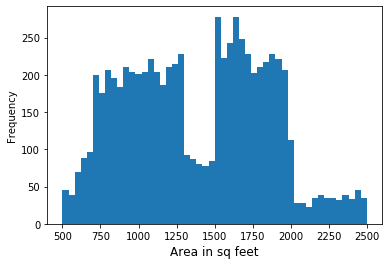

In [12]:
## Area of house in Square feet

df['INT_SQFT'].plot.hist(bins = 50)
plt.xlabel('Area in sq feet', fontsize=12)

- Most houses have the area between **750 sq feet to 1250 sq feet** or around **1500 sq feet to 2000 sq feet**
- Very less number of houses have area more than 2000 sq feet or less than 750 sq feet

### Value counts

In [13]:
# number of bedrooms

df['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

- It has four different categories
- This variable should be object and not integer

In [14]:
df['N_BEDROOM'].value_counts()/len(df)*100

1.0    53.383036
2.0    33.084822
3.0     9.945140
4.0     3.572936
Name: N_BEDROOM, dtype: float64

- About 53% houses have one bedroom
- 33% have 2 bedrooms
- Less than 10% houses have 3 bedrooms 
- Only 3.5% have 4 bedrooms

In [15]:
df['N_ROOM'].value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

- The 'Rooms' might have number of kitchen, hall, dinning area etc.
- No house with 1 room, and a very few that have 2

In [16]:
df['N_BATHROOM'].value_counts()/len(df)

1.0    0.786187
2.0    0.213110
Name: N_BATHROOM, dtype: float64

- 78% houses have 1 bathroom and 21% have 2 bathrooms
- The same can be represented using bar plots

### Bar Plot

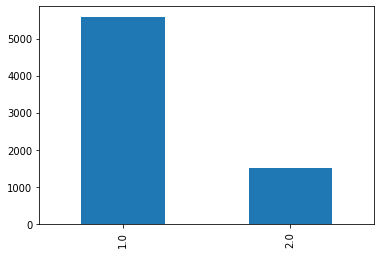

In [17]:
df['N_BATHROOM'].value_counts().plot(kind = 'bar')

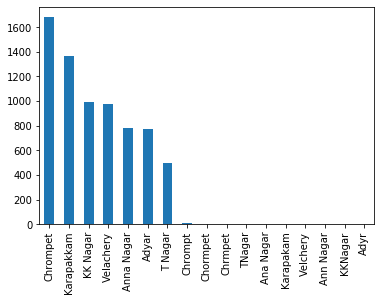

In [18]:
df['AREA'].value_counts().plot(kind = 'bar')

- There are 17 different categories in the 'AREA' variable
- Only 7 unique area name
- maximum houses are in the area Chrompet, followed by Karapakkam

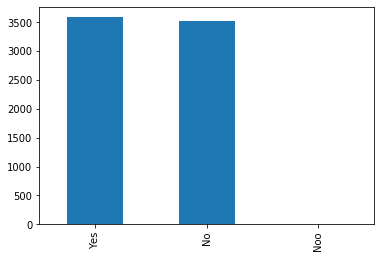

In [19]:
# houses with parking facility

df['PARK_FACIL'].value_counts().plot(kind = 'bar')

In [20]:
df['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

- There are only two unique categories
- The number of houses with parking facility in both the cases is almost the same